<b><H1>Project Name : Comcast Telecom Consumer Complaints</H1></b><br>
Name: Daniel Manova<br>
Date: 01-04-2021<br>
Course: Post Graduate Program in AI and Machine Learning<br>
Cohort : PGP AIML FEB 2021 Cohort 1<br>

In [1]:
# Importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

<b>Import data into Python environment</b>

In [2]:
# Read comcast telecome complaints data
df_comcast_telecom = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
# Top 10 data visualization
df_comcast_telecom.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [4]:
# Get dataframe information
df_comcast_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [5]:
# Checking for Null Count
df_comcast_telecom[df_comcast_telecom.isnull()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
# Converting Date and Date_month_year column from object to datetime64 dtype 
df_comcast_telecom['Date_month_year'] = pd.to_datetime(df_comcast_telecom['Date_month_year'])
df_comcast_telecom['Date'] = pd.to_datetime(df_comcast_telecom['Date'],format='%d-%m-%y')
df_comcast_telecom.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

<b>Provide the trend chart for the number of complaints at monthly and daily granularity levels<b>

In [7]:
# Creating new column Month from Date_month_year
df_comcast_telecom['Month'] = df_comcast_telecom['Date_month_year'].dt.month
df_comcast_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


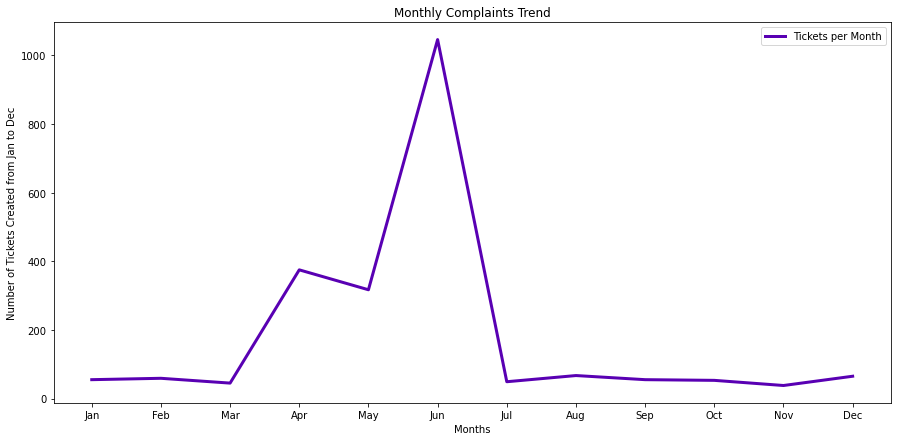

In [8]:
# Monthly Complaints Trend chart using matplotlib
plt.figure(figsize=(15,7))
plt.plot(sorted(df_comcast_telecom["Month"].unique()), df_comcast_telecom.groupby(["Month"]).size(), color='#5900b3',linestyle='-' , linewidth = 3, label ='Tickets per Month') # in the order x, y
plt.xticks(sorted(df_comcast_telecom["Month"].unique()),['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.yticks()
plt.xlabel('Months')
plt.ylabel('Number of Tickets Created from Jan to Dec')
plt.title('Monthly Complaints Trend')
plt.legend()
plt.show()


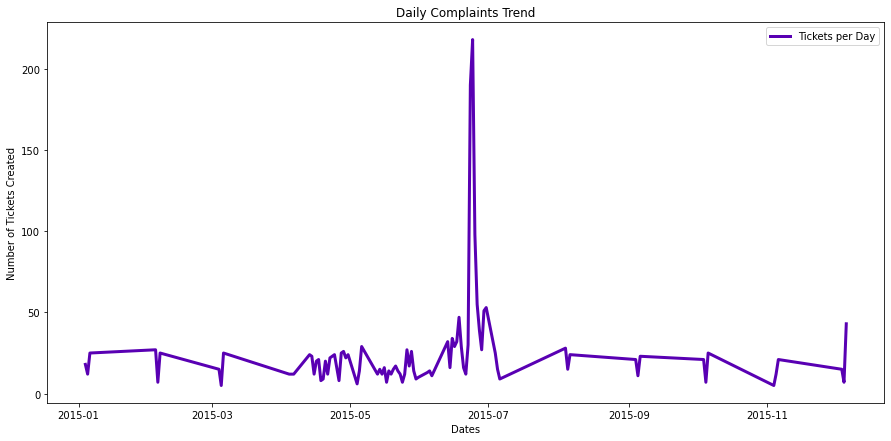

In [9]:
# Daily Complaints Trend chart using matplotlib

plt.figure(figsize=(15,7))
plt.plot(sorted(df_comcast_telecom["Date_month_year"].unique()), df_comcast_telecom.groupby(["Date_month_year"]).size(), color='#5900b3',linestyle='-' , linewidth = 3, label ='Tickets per Day') # in the order x, y
plt.xticks()
plt.xlabel('Dates')
plt.ylabel('Number of Tickets Created')
plt.title('Daily Complaints Trend')
plt.legend()
plt.show()

<b>Provide a table with the frequency of complaint types</b>

In [10]:
# Create a new column to list the types of Customer Complaints
df_comcast_telecom["Complaint Catagory"] = np.where(df_comcast_telecom["Customer Complaint"].str.contains('Internet|Speed|wifi|Access|Throttling|throt|Broadband|Cable|connection|DSL|modem|ip|ISP',case=False,regex=True), 'Internet',
         np.where(df_comcast_telecom["Customer Complaint"].str.contains('\$|Price|Pricing|Cost|Payment|Charg|pay|Bill|Billing|Rate|Contract|fee',case=False,regex=True), 'Billing',
         np.where(df_comcast_telecom["Customer Complaint"].str.contains('Service|Cap|usage|Data|Customer|switch|wait|support|TV|avail|network|cramming',case=False,regex=True), 'Network',
         np.where(df_comcast_telecom["Customer Complaint"].str.contains('Customer|complaint|breach|bully|False|fed up',case=False,regex=True), 'Grievance',
         np.where(df_comcast_telecom["Customer Complaint"].str.contains('email',case=False,regex=True), 'Email',
         np.where(df_comcast_telecom["Customer Complaint"].str.contains('outage',case=False,regex=True), 'Outages',
         'Other'))))))

In [11]:
# Display Catagorised Category in tabuler format
print(tabulate(df_comcast_telecom.groupby(["Complaint Catagory"]).size().to_frame(), headers=['Complaint Category','Number of Complaints'], tablefmt="fancy_grid"))

╒══════════════════════╤════════════════════════╕
│ Complaint Category   │   Number of Complaints │
╞══════════════════════╪════════════════════════╡
│ Billing              │                    553 │
├──────────────────────┼────────────────────────┤
│ Email                │                      8 │
├──────────────────────┼────────────────────────┤
│ Grievance            │                     42 │
├──────────────────────┼────────────────────────┤
│ Internet             │                    764 │
├──────────────────────┼────────────────────────┤
│ Network              │                    442 │
├──────────────────────┼────────────────────────┤
│ Other                │                    410 │
├──────────────────────┼────────────────────────┤
│ Outages              │                      5 │
╘══════════════════════╧════════════════════════╛


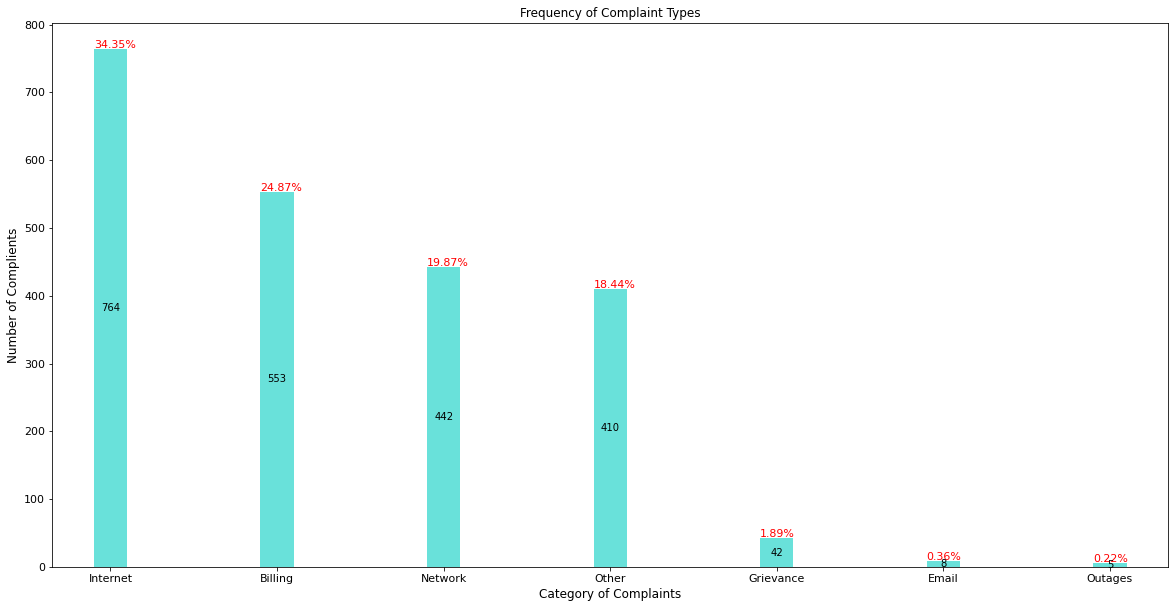

In [12]:
#Percentage of Issues By Category
ax = df_comcast_telecom['Complaint Catagory'].value_counts().plot(kind='bar', figsize=(20,10), color="#69E1DA", fontsize=11,width=0.2);
ax.set_alpha(0.8)
ax.set_title("Frequency of Complaint Types", fontsize=12)
ax.set_xlabel("Category of Complaints", fontsize=12);
ax.set_ylabel("Number of Complients", fontsize=12);
ax.tick_params(axis='x', labelrotation=360)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.text(i.get_x(), i.get_height()+2, str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,color ="red")
    ax.text(x+width/2, y+height/2,'{:.0f}'.format(height), horizontalalignment='center', verticalalignment='center')

<b>Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.</b>

In [13]:
#Find the unique elementents in Status column
df_comcast_telecom['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [14]:
#Create new column and catagorize status
df_comcast_telecom['Consolidated Status'] = ['Closed' if Status == 'Closed' or Status == 'Solved' else 'Open' for Status in df_comcast_telecom['Status']]
df_comcast_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Complaint Catagory,Consolidated Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Internet,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Billing,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Internet,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Network,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Network,Closed


<b>Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on</b>

In [15]:
# Create a df for state wise status
State_wise_status = df_comcast_telecom.groupby(['State','Consolidated Status']).size().unstack(level=-1).fillna(0).astype(int)

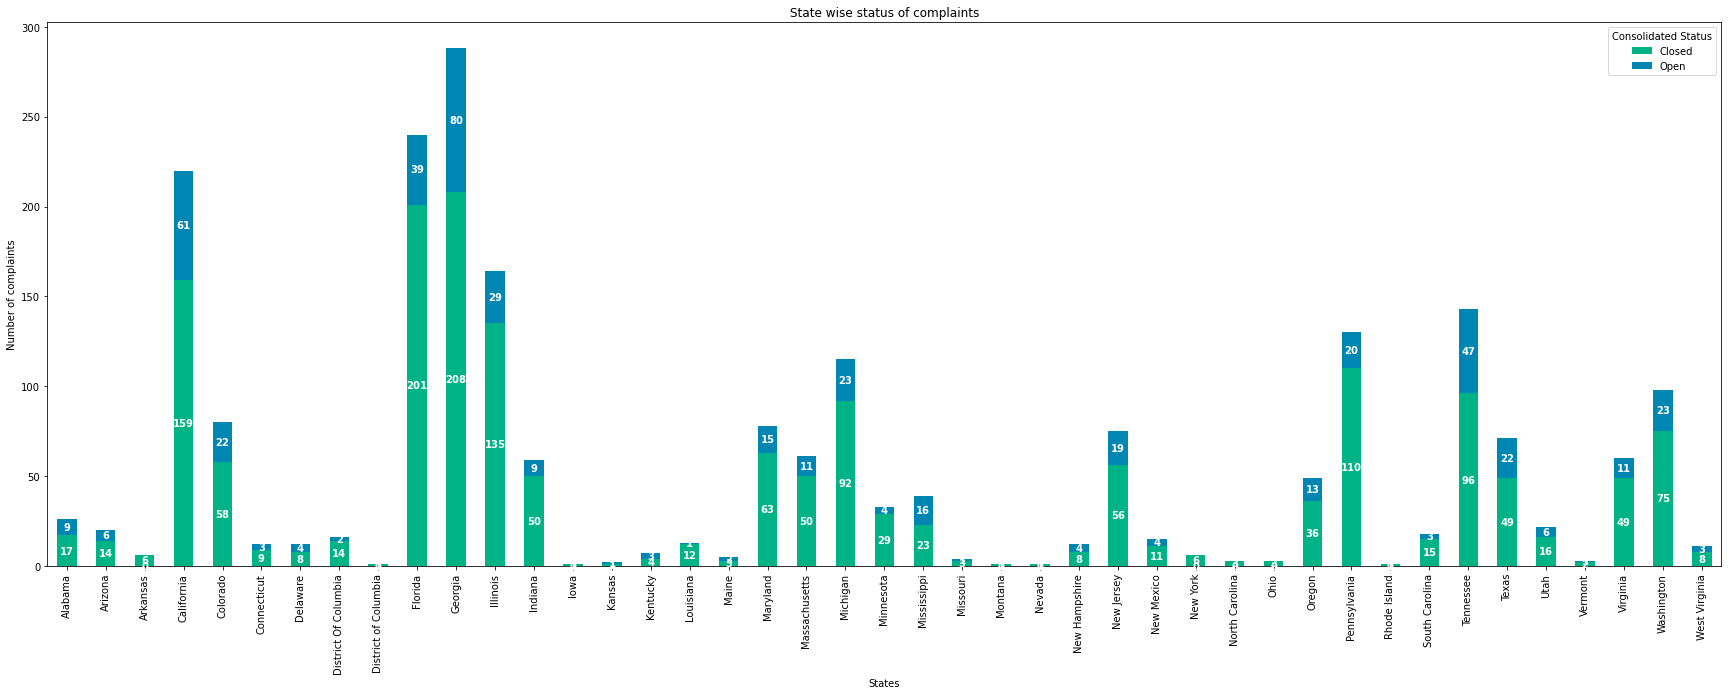

In [16]:
# State wise complaint status using Stacked bar chart with pandas
sws = State_wise_status.plot(kind='bar', figsize = (30,10), color=['#00b386','#0086b3'],title  = 'State wise status of complaints', xlabel = 'States', ylabel = 'Number of complaints', stacked = True)
sws.tick_params(axis='x', labelrotation=90)
sws.set_alpha(0.8)
for p in sws.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    sws.text(x+width/2, y+height/2, '{:.0f}'.format(height), color="white", horizontalalignment='center', verticalalignment='center', fontweight='bold')

<b>Which state has the maximum complaints</b>

In [17]:
# State has maximum complaints with ticket count
State_wise_status['Total Complaints'] = State_wise_status['Closed']+State_wise_status['Open']
print("State with maximum complains : {}".format(State_wise_status['Total Complaints'].idxmax()))
print("Total open complaints in {} : {}".format(State_wise_status['Total Complaints'].idxmax(),State_wise_status['Open'].max()))
print("Total closed complaints in {} : {}".format(State_wise_status['Total Complaints'].idxmax(),State_wise_status['Closed'].max()))

State with maximum complains : Georgia
Total open complaints in Georgia : 80
Total closed complaints in Georgia : 208


<b>Which state has the highest percentage of unresolved complaints</b>

In [18]:
# State with highest percentage of un-resolved complaints
State_wise_status['Un-Resolved %'] =  round((State_wise_status['Open']/State_wise_status['Open'].sum()) *100,2)
print("State with highest % of un-resolved complains : {}".format(State_wise_status['Un-Resolved %'].idxmax()))
print("Un-resolved complaints % in {} : {}%".format(State_wise_status['Total Complaints'].idxmax(),State_wise_status['Un-Resolved %'].max()))

State with highest % of un-resolved complains : Georgia
Un-resolved complaints % in Georgia : 15.47%


<b>Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls</b>

In [19]:
# Complaints received through Internet and Customer Care call with resolved percentage
Complaints_resolved = df_comcast_telecom.groupby(['Received Via','Consolidated Status']).size().unstack(level=-1)
Complaints_resolved['Resolved %'] = round((Complaints_resolved['Closed']/Complaints_resolved['Closed'].sum())*100,2)
print("Resolved % of complaints, received through Internet :  {}%".format(Complaints_resolved.loc['Internet']['Resolved %']))
print("Resolved % of complaints, received through Customer Care Call : {}%".format(Complaints_resolved.loc['Customer Care Call']['Resolved %']))

Resolved % of complaints, received through Internet :  49.38%
Resolved % of complaints, received through Customer Care Call : 50.62%


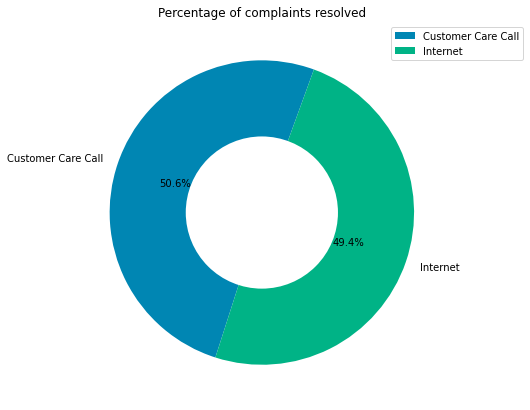

In [20]:
# Pie Chart for the complaints received through Internet and Customer Care call with resolved percentage
colors = ['#0086b3','#00b386'] 
labels = list(Complaints_resolved.index)
fig, ax1 = plt.subplots(figsize=(17,7))
fig.figsize=(20,10)
ax1.pie(Complaints_resolved['Closed'], colors = colors, labels=labels, autopct='%1.1f%%',startangle=70)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)  
plt.legend(labels, bbox_to_anchor=(1.2,1),loc="upper right")
plt.title('Percentage of complaints resolved')
plt.show()

<b>End of the Project</b>